In [9]:
from openai import OpenAI
from dotenv import load_dotenv
from pydantic import BaseModel, Field
from typing import List, Optional
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np
import yaml
import pandas as pd
import os
load_dotenv()
client = OpenAI()


from collections import Counter
import nltk

In [2]:
play_for_self = pd.read_csv('./dist/play_for_self_2_4.csv')
play_for_pairs = pd.read_csv('./dist/play_for_pairs_2_4.csv')

In [11]:
def get_word_diversity(sentences):
    # Calculate Lexical Diversity (Type-Token Ratio)
    tokens = [word for sentence in sentences for word in sentence.split()]
    unique_tokens = set(tokens)
    lexical_diversity = len(unique_tokens) / len(tokens)

    # Calculate Word Entropy
    word_counts = Counter(tokens)
    total_words = sum(word_counts.values())
    probabilities = [count / total_words for count in word_counts.values()]
    entropy = -sum(p * np.log2(p) for p in probabilities)

    print(f"Lexical Diversity (TTR): {lexical_diversity:.2f}")
    print(f"Entropy: {entropy:.2f}")
    return lexical_diversity, entropy

In [15]:
play_for_self_diversity = []
for temperature in play_for_self['temperature'].unique():
    print(f"Temperature: {temperature}")
    sentences = play_for_self[play_for_self['temperature'] == temperature]['note']
    lexical_diveristy, entropy = get_word_diversity(sentences)
    play_for_self_diversity.append((temperature, lexical_diveristy, entropy))
    print(f"Temperature: {temperature}; Lexical Diversity: {lexical_diveristy:.2f}; Entropy: {entropy:.2f}")
    
play_for_pairs_diversity = []
for temperature in play_for_pairs['temperature'].unique():
    print(f"Temperature: {temperature}")
    sentences = play_for_pairs[play_for_pairs['temperature'] == temperature]['note']
    lexical_diveristy, entropy = get_word_diversity(sentences)
    play_for_pairs_diversity.append((temperature, lexical_diveristy, entropy))
    print(f"Temperature: {temperature}; Lexical Diversity: {lexical_diveristy:.2f}; Entropy: {entropy:.2f}")

Temperature: 0.5
Lexical Diversity (TTR): 0.08
Entropy: 6.04
Temperature: 0.5; Lexical Diversity: 0.08; Entropy: 6.04
Temperature: 0.75
Lexical Diversity (TTR): 0.12
Entropy: 6.60
Temperature: 0.75; Lexical Diversity: 0.12; Entropy: 6.60
Temperature: 1.0
Lexical Diversity (TTR): 0.14
Entropy: 6.99
Temperature: 1.0; Lexical Diversity: 0.14; Entropy: 6.99
Temperature: 1.25
Lexical Diversity (TTR): 0.18
Entropy: 7.34
Temperature: 1.25; Lexical Diversity: 0.18; Entropy: 7.34
Temperature: 1.5
Lexical Diversity (TTR): 0.42
Entropy: 9.19
Temperature: 1.5; Lexical Diversity: 0.42; Entropy: 9.19
Temperature: 0.5
Lexical Diversity (TTR): 0.08
Entropy: 6.06
Temperature: 0.5; Lexical Diversity: 0.08; Entropy: 6.06
Temperature: 0.75
Lexical Diversity (TTR): 0.12
Entropy: 6.62
Temperature: 0.75; Lexical Diversity: 0.12; Entropy: 6.62
Temperature: 1.0
Lexical Diversity (TTR): 0.15
Entropy: 7.03
Temperature: 1.0; Lexical Diversity: 0.15; Entropy: 7.03
Temperature: 1.25
Lexical Diversity (TTR): 0.18
En

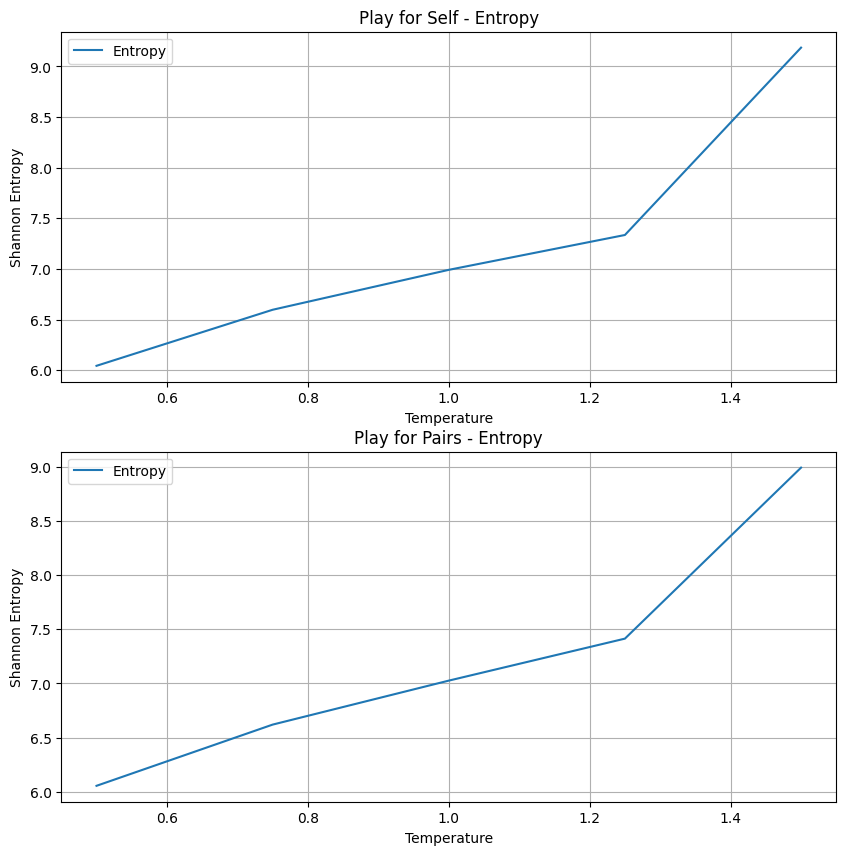

In [18]:
plt.figure(figsize=(10, 10))
""""
plt.subplot(2, 2, 1)
plt.plot([x[0] for x in play_for_self_diversity], [x[1] for x in play_for_self_diversity], label="Lexical Diversity")
plt.title("Play for Self - Lexical Diversity")
plt.xlabel("Temperature")
plt.ylabel("Lexical Diversity")
plt.legend()
plt.grid()
"""
plt.subplot(2, 1, 1)
plt.plot([x[0] for x in play_for_self_diversity], [x[2] for x in play_for_self_diversity], label="Entropy")
plt.title("Play for Self - Entropy")
plt.xlabel("Temperature")
plt.ylabel("Shannon Entropy")
plt.legend()
plt.grid()
"""
plt.subplot(2, 2, 3)
plt.plot([x[0] for x in play_for_pairs_diversity], [x[1] for x in play_for_pairs_diversity], label="Lexical Diversity")
plt.title("Play for Pairs - Lexical Diversity")
plt.xlabel("Temperature")
plt.ylabel("Lexical Diversity")
plt.legend()
plt.grid()
"""
plt.subplot(2, 1, 2)
plt.plot([x[0] for x in play_for_pairs_diversity], [x[2] for x in play_for_pairs_diversity], label="Entropy")
plt.title("Play for Pairs - Entropy")
plt.xlabel("Temperature")
plt.ylabel("Shannon Entropy")
plt.legend()
plt.grid()

plt.show()